**Resultados - GeoCov19 - Tweets com geolocalizações no Brasil**

Base de dados GeoCov19:
- Período analisado: 01/02/2020 a 01/05/2020
- Quantidade de Tweets totais: 524 milhões+
- Total de arquivos zip baixados: 90 arquivos
- Volume de dados totais: 270 GB 
---
Processamento de dados brasileiros - GeoCov19:
- Quantidade de Tweets contendo geolocalizações brasileiras: 6186812
- Volume de dados totais selecionados com geolocalizações brasileiras: 1,2 GB
- Tempo aproximado para processamento dos arquivos (descompatação dos zips + seleção de tweets brasileiros): 3h+
- Tempo aproximado para criação do banco MongoBD: 40min+
---
Hydrate dos tweets com o Twarc:
- Quantidade total de Tweets hidratados (downloads pelo Twarc): 5031502
- Tempo aproximado de download: 24h
- Tempo aproximado para atualização do banco MongoBD contendo textos: 3h (Primeira versão: 27h)
---
Cálculo do score de sentimento com o VaderSentiment:
- Quantidade total de Tweets com score calculado: 500000+ (somente textos em inglês)
- Tempo aproximado para atualização do banco MongoDB contendo escores: 40min+

Importações e configurações do banco de dados

In [2]:
import pandas as pd
import geocov19_functions_dfutil as dfutil
import matplotlib.pyplot as plt

In [3]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)
db = client.SpedDB
collection = db.tweets_brasil

Quantidade total de registros com geolocalizações brasileiras cadastrados no banco MongoDB

In [3]:
collection.count_documents({})

6186812

Quantidade de registros contendo textos retornados pela ferramenta Twarc

In [3]:
collection.count_documents({'text': {'$ne':None}})

5031502

Montando dataframe com registros retornados para a geração de gráficos

In [26]:
df = pd.DataFrame.from_records(collection.find({'lang': {'$ne':None}}, {'state':1,'city':1,'lang':1,'geo_source':1,'_id': 0}))

Distribuição de tweets por estado

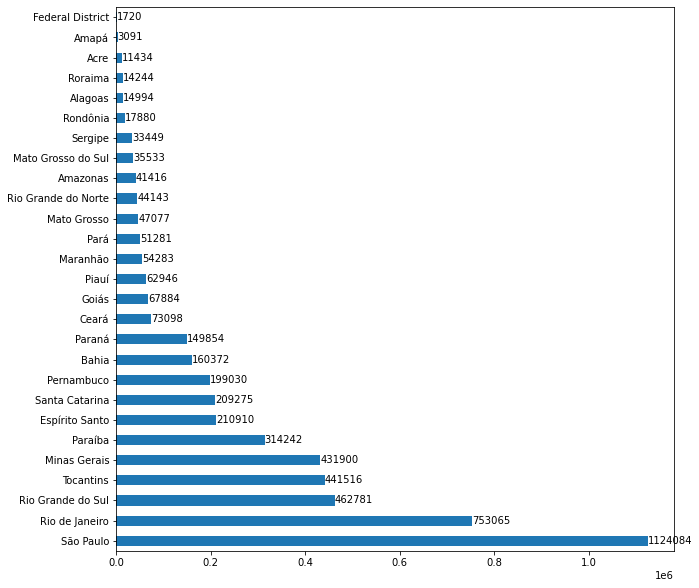

In [27]:
# Distribuição de tweets por estado
df.state.value_counts().plot(kind='barh', figsize=(10, 10))

for index, value in enumerate(df.state.value_counts()):
    plt.text(value, index, str(value), verticalalignment='center')

Distribuição de tweets por cidade (20 cidades com maiores quantidades)

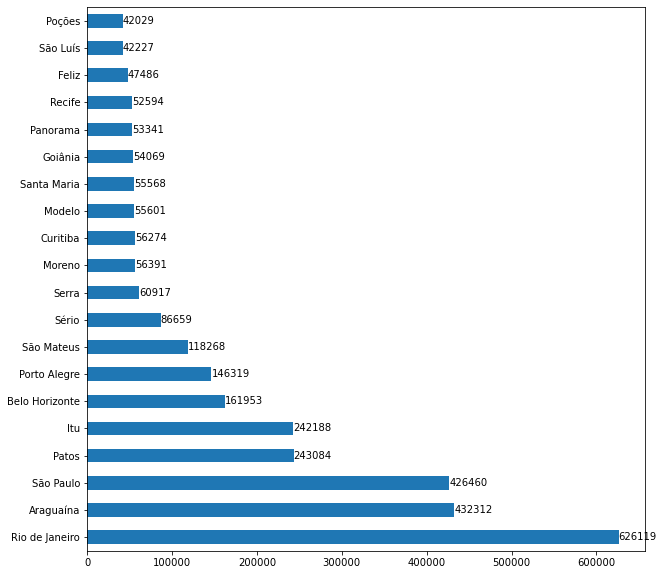

In [28]:
df.city.value_counts()[:20].plot(kind='barh', figsize=(10, 10))

for index, value in enumerate(df.city.value_counts()[:20]):
    plt.text(value, index, str(value), verticalalignment='center')

Distribuição de tweets por "geo_source" 

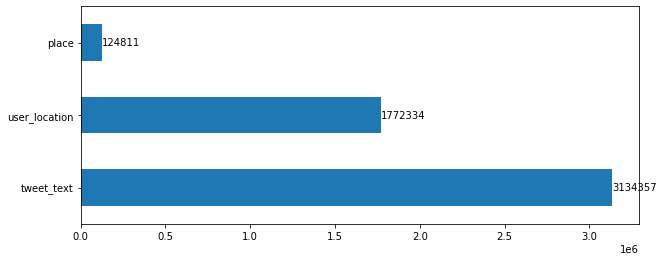

In [29]:
df.geo_source.value_counts().plot(kind='barh', figsize=(10, 4))

for index, value in enumerate(df.geo_source.value_counts()):
    plt.text(value, index, str(value), verticalalignment='center')

Distribuição dos tweets por língua

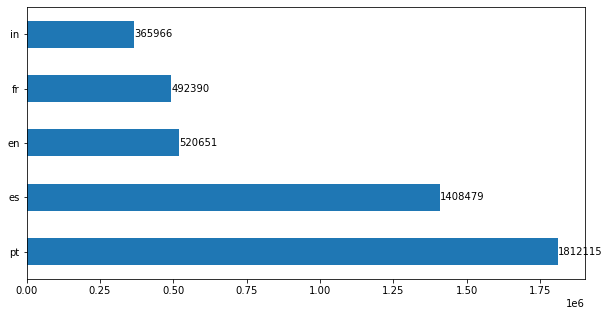

In [30]:
df.lang.value_counts()[:5].plot(kind='barh', figsize=(10, 5))

for index, value in enumerate(df.lang.value_counts()[:5]):
    plt.text(value, index, str(value), verticalalignment='center')

Montando dataframe com registros com o score de sentimento calculado (Temporariamente somente para tweets escritos em inglês)

In [11]:
# Média de score de sentimentos por estado
df2 = pd.DataFrame.from_records(collection.find({'score': {'$ne':None},'lang': {'$ne':None}}, {'state':1,'score':1,'period':1,'_id': 0}))

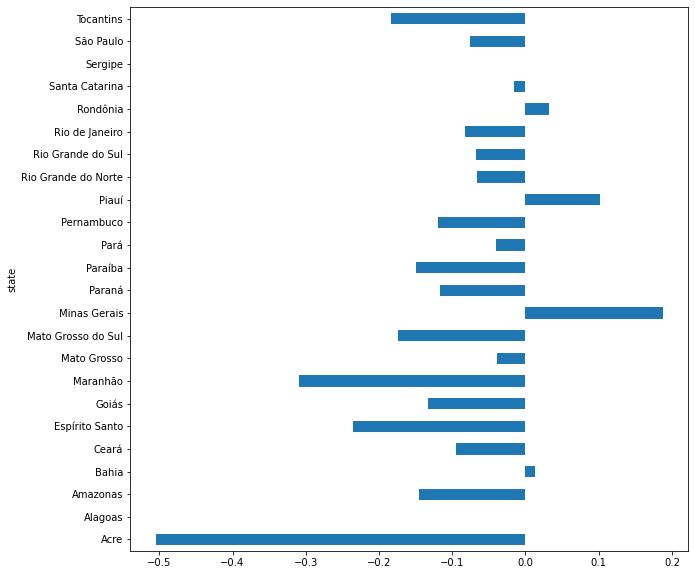

In [84]:
df2.groupby('state')['score'].mean().plot(kind='barh', figsize=(10, 10))

In [9]:
def generate_period_graphic(df_original):
    
    df = dfutil.building_periods_df(df_original)
    
    # Executando merge nos dataframes de períodos para recuperar período de tweets em comum
    x = df.period
    y = df.score_mean
    
    label = 'Período'
    color = 'red'
    xLabel = 'Período (Ano_Mês_Dia)'
    yLabel = 'Média Score'
    title = 'Média de Scores de Sentimentos por Data'
      
    plt.rcParams['figure.figsize'] = (18,9)
    plt.plot(x,y,color=color, linestyle='solid', linewidth=2,label=label)

    plt.xticks(rotation=90)
    plt.legend(fontsize=15)
    plt.xlabel(xLabel,fontsize=15)
    plt.ylabel(yLabel,fontsize=15)
    plt.title(title)
    
    plt.show()

Gráfico de média de score de sentimentos por data (Período 01/02/2020 a 05/01/2020)

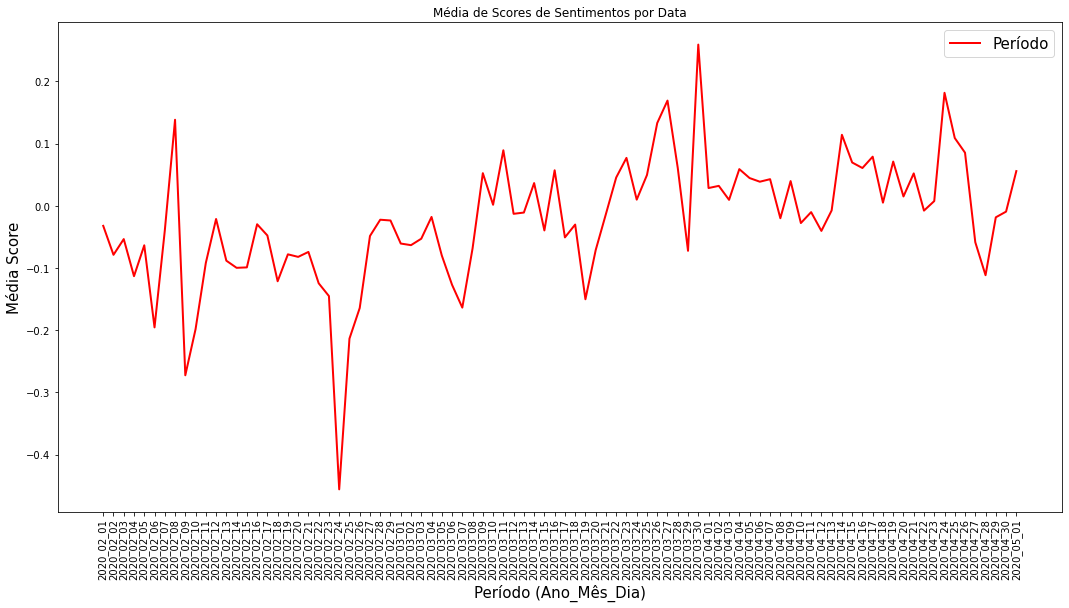

In [12]:
generate_period_graphic(df2)

In [5]:
oneResult = collection.find_one({"tweet_id": 1223411745500188672})
print(oneResult)

{'_id': ObjectId('5f501410da596ab0c7238d33'), 'tweet_id': 1223411745500188672, 'created_at': datetime.datetime(2020, 2, 1, 1, 4, 24), 'user_id': '3266862206', 'geo_source': 'user_location', 'state': 'São Paulo', 'city': 'Santos', 'text': 'RT @choogarrie: Filipino hospitality is a kind of hospitality that will bring us to the hospital. #coronavirus', 'score': 0.0, 'lang': 'en', 'period': '2020_02_01'}


In [6]:
oneResult = collection.find_one({"lang": "in"})
print(oneResult)

{'_id': ObjectId('5f501411da596ab0c72391e4'), 'tweet_id': 1223972807358304257, 'created_at': datetime.datetime(2020, 2, 2, 14, 13, 52), 'user_id': '1110428876180615168', 'geo_source': 'tweet_text', 'state': 'São Paulo', 'city': 'Itu', 'text': 'RT @mybabyikon: Mana foto demonya antis chen yang cuma secuil itu? Kurang lebih gitulah nanti si mbak mbak itu kelakuannya. Seluruh dunia s…', 'score': None, 'lang': 'in', 'period': '2020_02_02'}
